Script for plotting my manual onset times so that you can see which channel is the onset

In [60]:
import numpy as np
import pandas as pd
import os
import ieeg_funcs as ief
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
sub='NA'
# sub='TF'
csv_path='/Users/davidgroppe/ONGOING/SZR_SPREAD/PATIENTS/'+sub+'/ONSETTIMES/'
#csv_path=os.path.join('/Users/davidgroppe/ONGOING/SZR_SPREAD/PATIENTS/',sub,'/ONSETTIMES/')
print('Importing manual onset times from %s' % csv_path)
csv_list=list()
for f in os.listdir(csv_path):
    if f.endswith('manualOnsets.txt'):
        csv_list.append(f)

n_files=len(csv_list)
print('%d manual wide-band onset files found' % n_files)

Importing manual onset times from /Users/davidgroppe/ONGOING/SZR_SPREAD/PATIENTS/NA/ONSETTIMES/
7 manual wide-band onset files found


In [74]:
temp_df.head()

,Channel,OnsetTimeWindow,OnsetTimeInSeconds
0,LHD1-LHD2,2764,138.652
1,LHD2-LHD3,2497,125.302
2,LHD3-LHD4,1903,95.602
3,LOF1-LOF2,1995,100.202
4,LOF2-LOF3,1991,100.002


In [75]:
chan_labels=list()
for csv_loop in range(n_files):
    temp_df=pd.read_csv(os.path.join(csv_path,csv_list[csv_loop]))
    sec_df=temp_df.iloc[:,2]
    if csv_loop==0:
        n_chan=temp_df.shape[0]
        bband_onset_times=np.zeros((n_chan,n_files))
    for chan_loop in range(n_chan):
        bband_onset_times[chan_loop,csv_loop]=sec_df[chan_loop]
        if csv_loop==0:
            chan_labels.append(temp_df.iloc[chan_loop,0])
    # normalize onset so that 0 is earliest channel
    bband_onset_times[:,csv_loop]=bband_onset_times[:,csv_loop]-np.nanmin(bband_onset_times[:,csv_loop])
chan_labels=ief.clean_labels(chan_labels)

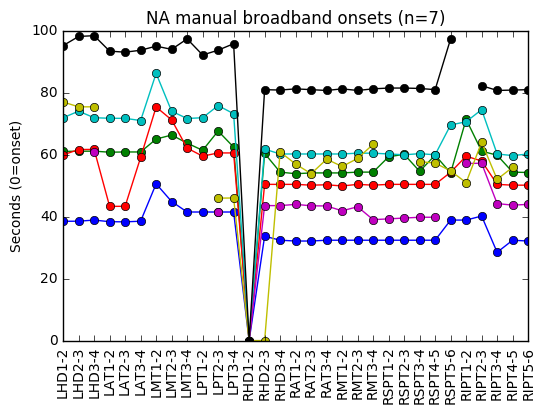

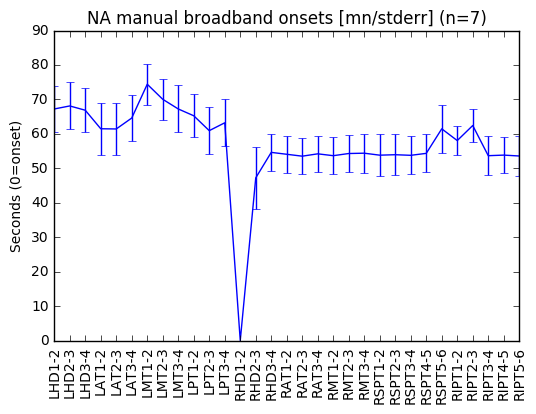

In [87]:
plt.figure(1)
plt.clf()
_=plt.plot(bband_onset_times,'o-')
plt.ylabel('Seconds (0=onset)')
_=plt.xticks(np.arange(0,n_chan),chan_labels,rotation='vertical',fontsize=10)
_=plt.title(sub+' manual broadband onsets (n='+str(n_files)+')')

plt.figure(2)
plt.clf()
#_=plt.plot(np.nanmean(bband_onset_times,axis=1),'o-')
_=plt.errorbar(np.arange(n_chan),np.nanmean(bband_onset_times,axis=1),
               yerr=np.nanstd(bband_onset_times,axis=1)/np.sqrt(n_files))
plt.ylabel('Seconds (0=onset)')
_=plt.xticks(np.arange(0,n_chan),chan_labels,rotation='vertical')
_=plt.title(sub+' manual broadband onsets [mn/stderr] (n='+str(n_files)+')')

In [72]:
# Channel with earlist avg onset
mn_onset=np.nanmean(bband_onset_times,axis=1)
min_id=np.argmin(mn_onset)
print('Channel with earliest mean onset: {} ({:.2f} sec)'.format(chan_labels[min_id],mn_onset[min_id]))

Channel with earliest mean onset: RHD1-2 (1.73 sec)
